In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [35]:
df=pd.read_csv('gld_price_data.csv')

In [36]:
df.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [37]:
df.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [38]:
df.shape

(2290, 6)

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [40]:
df.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [41]:
df.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [42]:
correlation=df.corr()

<AxesSubplot:>

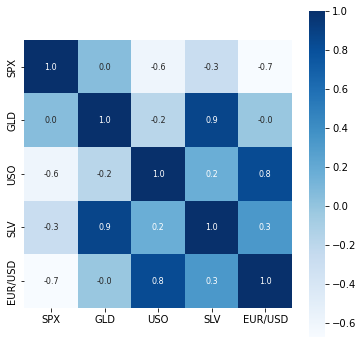

In [43]:
#constructing a heatmap to understand the correlation
plt.figure(figsize= (6,6))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')

In [44]:
#correlation values of GLD
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


C:\Users\Darshan G\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='GLD', ylabel='Density'>

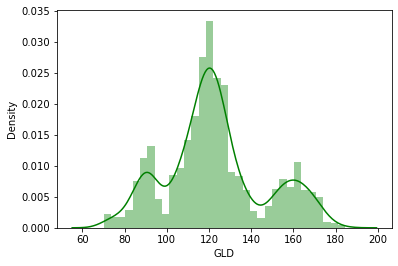

In [45]:
#checking the distribution of the GLD Price
sns.distplot(df['GLD'],color='green')

spliting the Features and Target

In [46]:
x=df.drop(['Date','GLD'],axis=1)
y=df['GLD']

In [47]:
x

,SPX,USO,SLV,EUR/USD
0,1447.160034,78.470001,15.1800,1.471692
1,1447.160034,78.370003,15.2850,1.474491
2,1411.630005,77.309998,15.1670,1.475492
3,1416.180054,75.500000,15.0530,1.468299
4,1390.189941,76.059998,15.5900,1.557099
...,...,...,...,...
2285,2671.919922,14.060000,15.5100,1.186789
2286,2697.790039,14.370000,15.5300,1.184722
2287,2723.070068,14.410000,15.7400,1.191753
2288,2730.129883,14.380000,15.5600,1.193118


In [48]:
y

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64

spliting into Training data and Test data

In [49]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

Model Training:Random Forest Regressor

In [50]:
regressor=RandomForestRegressor(n_estimators=100)

In [51]:
#training the model
regressor.fit(x_train,y_train)

RandomForestRegressor()

Model Evaluation

In [52]:
#prediction on Test Data
test_data_prediction=regressor.predict(x_test)

In [53]:
print(test_data_prediction)

[168.43949924  82.17019985 115.91360062 127.68580085 120.89130126
 154.74299725 150.4958987  126.0731002  117.55719879 126.1904001
 116.61730125 172.01530072 142.06919911 167.74589871 115.14440031
 117.42930054 138.92290314 170.240301   159.62280315 157.37779958
 155.16580056 125.25020001 176.09189934 157.41080325 125.27240014
  93.60799973  78.01100003 120.66080005 119.06929938 167.49100044
  88.20540014 125.42290049  90.86460081 117.63260036 121.27149893
 136.33490178 115.46580109 114.98910055 146.98869966 107.13010094
 104.14120242  87.16849766 126.47050046 117.87010045 154.01569918
 119.59140014 108.48779965 108.52789829  93.22460055 127.06419751
  74.51410032 113.70169908 121.48440006 111.1890991  118.85809895
 120.20419965 159.06530006 167.61430099 146.85249662  85.77979891
  94.15490041  86.78589917  90.47180022 119.06490081 126.50570066
 127.53370003 169.80710032 122.23589911 117.32419923  98.45939993
 168.62250199 143.36109841 132.3451025  121.2590024  121.75209915
 119.782500

In [54]:
#R squared error
error_score=metrics.r2_score(y_test,test_data_prediction)
print("R squared error :",error_score)

R squared error : 0.9893725628210456



compare the Actual values and Predicted values in a Plot

In [55]:
y_test=list(y_test)

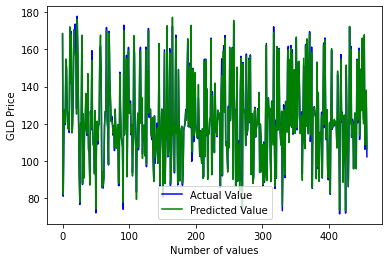

In [56]:
plt.plot(y_test, color='blue',label='Actual Value')
plt.plot(test_data_prediction, color='green', label='Predicted Value')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()